In [21]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('../data/filenames_and_sizes.csv')

In [15]:
fl = []
for f in df.files.values:
    for i in ['Plate1007','Plate1018','Plate1102','Plate1103','Plate1104']:
        if i in f:
            fl.append(f)

In [54]:
def extract_plate(identifier):
    return int(re.search('Plate(\d+)', identifier).group(1))

In [48]:
ext_l = df.loc[df['files'].isin(fl)].copy()

In [49]:
ext_l['plate'] = ext_l['files'].apply(extract_plate)

In [50]:
avgs = ext_l.groupby('plate')['file_size'].mean().reset_index()

In [52]:
avgs['file_size'] = avgs['file_size']/1000000

In [55]:
df['plate'] = df['files'].apply(extract_plate)

In [87]:
df_avgs = df.groupby('plate')['file_size'].mean().reset_index()

In [88]:
df_avgs['file_size'] = df_avgs['file_size']/1000000

In [91]:
def add_pass_fail(df):
    
    for i, row in df.iterrows():
        if row['plate'] in [1007, 1018, 1102, 1103, 1104]:
            df.loc[i,'passfail'] = 'fail'
        else:
            df.loc[i, 'passfail'] = 'pass'
    return(df)
        


In [93]:
pf = add_pass_fail(df_avgs)

In [60]:
import rpy2
%load_ext rpy2.ipython

In [94]:
%Rpush pf

In [97]:
pf

,plate,file_size,passfail
0,1007,6.716643,fail
1,1008,4.788823,pass
2,1009,4.473932,pass
3,1010,4.906305,pass
4,1013,5.696852,pass
5,1014,5.789985,pass
6,1015,5.062630,pass
7,1016,5.264685,pass
8,1017,4.817990,pass
9,1018,2.270405,fail


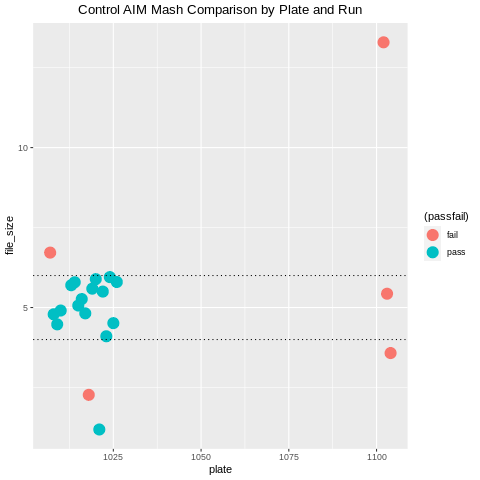

In [96]:
%%R 
library('ggplot2')
p2 <- (
    ggplot(pf, aes(plate, file_size, colour=(passfail))) + 
    geom_point(size=5) +
    geom_hline(yintercept=6, linetype="dotted", color="black") +
    geom_hline(yintercept=4, linetype="dotted", color="black") +
    labs(title="Control AIM Mash Comparison by Plate and Run") +
    theme(plot.title = element_text(hjust = 0.5))
)
p2